
# 初始化

欢迎来到“改善深度神经网络”的第一项作业。

训练神经网络需要指定权重的初始值，而一个好的初始化方法将有助于网络学习。

如果你完成了本系列的上一课程，则可能已经按照我们的说明完成了权重初始化。但是，如何为新的神经网络选择初始化？在本笔记本中，你能学习看到不同的初始化导致的不同结果。

好的初始化可以：

    加快梯度下降、模型收敛
    减小梯度下降收敛过程中训练（和泛化）出现误差的几率

首先，运行以下单元格以加载包和用于分类的二维数据集。


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils   #第一部分，初始化
import reg_utils    #第二部分，正则化
import gc_utils     #第三部分，梯度校验
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec
%matplotlib inline #如果你使用的是Jupyter Notebook，请取消注释。
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

UsageError: unrecognized arguments: #如果你使用的是Jupyter Notebook，请取消注释。


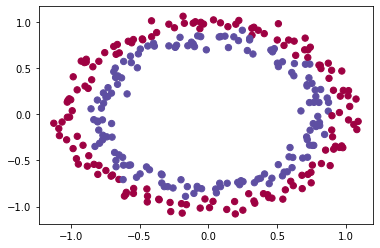

In [3]:
# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = init_utils.load_dataset()

我们希望分类器将蓝点和红点分开。


## 1 神经网络模型

你将使用已经实现了的3层神经网络。 下面是你将尝试的初始化方法：

    零初始化 ：在输入参数中设置initialization = "zeros"。
    随机初始化 ：在输入参数中设置initialization = "random"，这会将权重初始化为较大的随机值。
    He初始化 ：在输入参数中设置initialization = "he"，这会根据He等人（2015）的论文将权重初始化为按比例缩放的随机值。

说明：请快速阅读并运行以下代码，在下一部分中，你将实现此model()调用的三种初始化方法。


In [4]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 零初始化

在神经网络中有两种类型的参数要初始化：

    权重矩阵 

    偏差向量

**练习**：实现以下函数以将所有参数初始化为零。 稍后你会看到此方法会报错，因为它无法“打破对称性”。总之先尝试一下，看看会发生什么。确保使用正确维度的np.zeros（（..，..））。

In [5]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
    return parameters

In [6]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


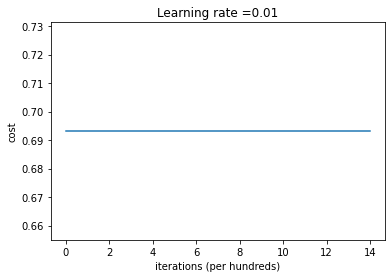

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [9]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

性能确实很差，损失也没有真正降低，该算法的性能甚至不如随机猜测。为什么呢？让我们看一下预测的详细信息和决策边界：

In [10]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


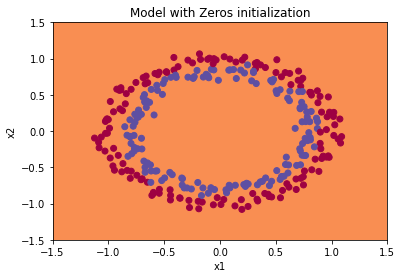

In [11]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

该模型预测的每个示例都为0。

通常，将所有权重初始化为零会导致网络无法打破对称性。 这意味着每一层中的每个神经元都将学习相同的东西，且该网络的性能不如线性分类器，例如逻辑回归。


## 3 随机初始化

为了打破对称性，让我们随机设置权重。 在随机初始化之后，每个神经元可以继续学习其输入的不同特征。 在本练习中，你将看到如果将权重随机初始化为非常大的值会发生什么。

练习：实现以下函数，将权重初始化为较大的随机值（按\*10缩放），并将偏差设为0。 将 np.random.randn(..,..) \* 10用于权重，将np.zeros((.., ..))用于偏差。我们使用固定的np.random.seed(..)，以确保你的“随机”权重与我们的权重匹配。因此，如果运行几次代码后参数初始值始终相同，也请不要疑惑。


In [12]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###

    return parameters

In [13]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


E:\Jupyter_Notebook\【吴恩达课后编程作业】Course 2 - 改善深层神经网络 - 第一周作业(1&2&3)\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\Jupyter_Notebook\【吴恩达课后编程作业】Course 2 - 改善深层神经网络 - 第一周作业(1&2&3)\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250982793959966
Cost after iteration 2000: 0.5981216596703697
Cost after iteration 3000: 0.5638417572298645
Cost after iteration 4000: 0.5501703049199763
Cost after iteration 5000: 0.5444632909664456
Cost after iteration 6000: 0.5374513807000807
Cost after iteration 7000: 0.4764042074074983
Cost after iteration 8000: 0.39781492295092263
Cost after iteration 9000: 0.3934764028765484
Cost after iteration 10000: 0.3920295461882659
Cost after iteration 11000: 0.38924598135108
Cost after iteration 12000: 0.3861547485712325
Cost after iteration 13000: 0.384984728909703
Cost after iteration 14000: 0.3827828308349524


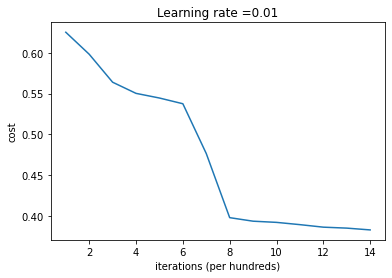

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [14]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)



因为数值舍入，你可能在0迭代之后看到损失为"inf"，我们会在之后用更复杂的数字实现解决此问题。

总之，看起来你的对称性已打破，这会带来更好的结果。 相比之前，模型不再输出全0的结果了。


In [16]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


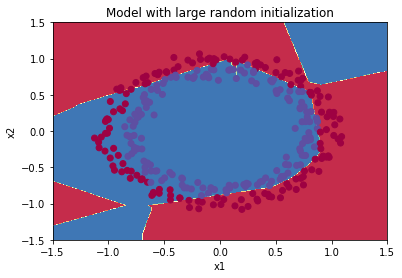

In [17]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**观察**：

    损失一开始很高是因为较大的随机权重值，对于某些数据，最后一层激活函数sigmoid输出的结果非常接近0或1，并且当该示例数据预测错误时，将导致非常高的损失。
    初始化不当会导致梯度消失/爆炸，同时也会减慢优化算法的速度。
    训练较长时间的网络，将会看到更好的结果，但是使用太大的随机数进行初始化会降低优化速度。

**总结**：

    将权重初始化为非常大的随机值效果不佳。
    初始化为较小的随机值会更好。重要的问题是：这些随机值应为多小？让我们在下一部分中找到答案！


## 4 He初始化

最后，让我们尝试一下“He 初始化”，该名称以He等人的名字命名（类似于“Xavier初始化”，但Xavier初始化使用比例因子 sqrt(1./layers_dims[l-1])来表示权重$W^{[L]}$，而He初始化使用sqrt(2./layers_dims[l-1])）。

**练习**：实现以下函数，以He初始化来初始化参数。

**提示**：此函数类似于先前的initialize_parameters_random(...)。 唯一的不同是，无需将np.random.randn(..,..)乘以10，而是将其乘以sqrt(2./layers_dims[l-1])），这是He初始化建议使用的ReLU激活层。

In [18]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

In [19]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


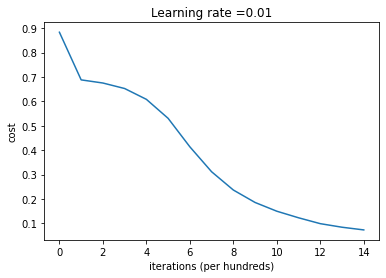

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [20]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

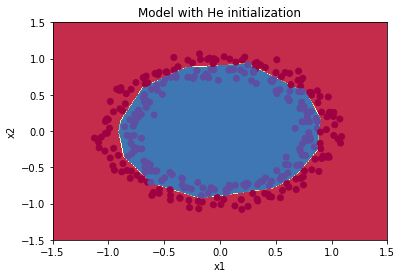

In [21]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)




**观察**：

    使用He初始化的模型可以在少量迭代中很好地分离蓝色点和红色点。


## 5 总结

我们已经学习了三种不同类型的初始化方法。对于相同的迭代次数和超参数，三种结果比较为：

|  Model | 测试准确率|  评价  |
|:----:|:----:|:----:|
|零初始化的3层NN|50％|未能打破对称性|
|随机初始化的3层NN|83％|权重太大|
|He初始化的3层NN|99％|推荐方法|

**此作业中应记住的内容**：

    不同的初始化会导致不同的结果
    随机初始化用于打破对称性，并确保不同的隐藏单元可以学习不同的东西
    不要初始化为太大的值
    初始化对于带有ReLU激活的网络非常有效。


# 正则化

欢迎来到本周的第二次作业。
深度学习模型具有很高的灵活性和能力，如果训练数据集不够大，将会造成一个严重的问题--过拟合。尽管它在训练集上效果很好，但是学到的网络不能应用到测试集中！

**你将学习**： 在深度学习模型中使用正则化。

首先导入要使用的包。


In [23]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**问题陈述**：你刚刚被法国足球公司聘为AI专家。他们希望你推荐预测法国守门员将球踢出的位置，以便法国队的球员可以用头将球击中。
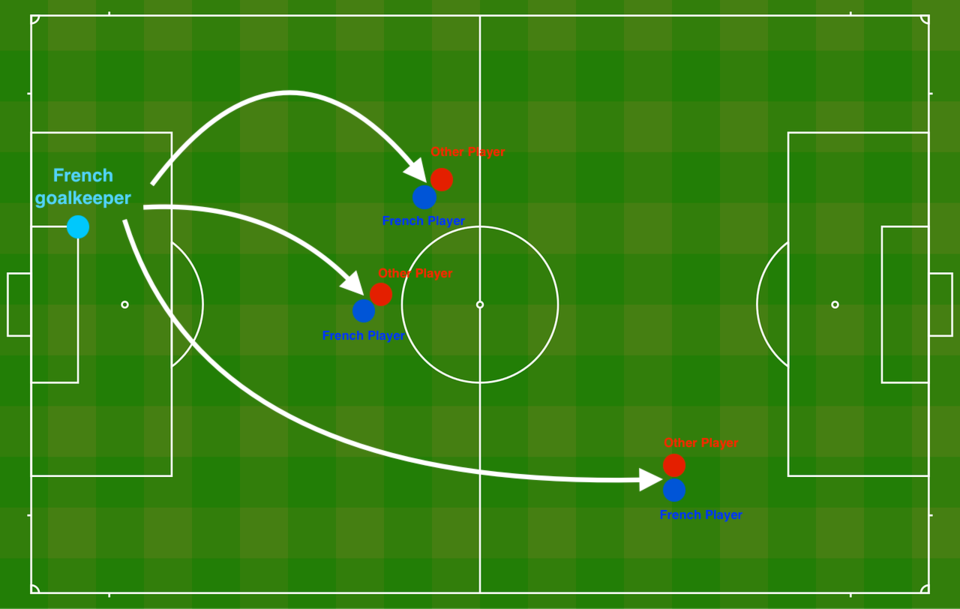

他们为你提供了法国过去10场比赛的二维数据集。

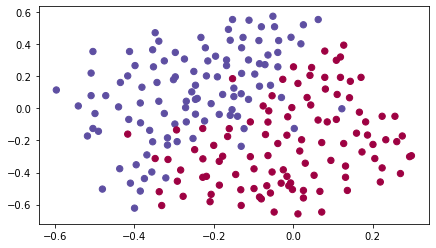

In [24]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()



数据中每个点对应于足球场上的位置，在该位置上，法国守门员从足球场左侧射出球后，足球运动员用他/她的头部击中了球。

    如果圆点为蓝色，则表示法国球员设法用头部将球击中
    如果圆点为红色，则表示另一支球队的球员用头撞球

**你的目标**：运用深度学习模型预测守门员应将球踢到球场上的位置。

**数据集分析**：该数据集含有噪声，但看起来一条将左上半部分（蓝色）与右下半部分（红色）分开的对角线会很比较有效。

你将首先尝试非正则化模型。然后学习如何对其进行正则化，并决定选择哪种模型来解决法国足球公司的问题。



## 1 非正则化模型

你将使用以下神经网络（已为你实现），可以如下使用此模型：

    在regularization mode中，通过lambd将输入设置为非零值。我们使用lambd代替lambda，因为lambda是Python中的保留关键字。
    在dropout mode中，将keep_prob设置为小于1的值

首先，你将尝试不进行任何正则化的模型。然后，你将实现：

    L2 正则化 函数：compute_cost_with_regularization()和backward_propagation_with_regularization()
    Dropout 函数：forward_propagation_with_dropout()和backward_propagation_with_dropout()

在每个部分中，你都将使用正确的输入来运行此模型，以便它调用已实现的函数。查看以下代码以熟悉该模型。


In [25]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

让我们在不进行任何正则化的情况下训练模型，并观察训练/测试集的准确性。

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724196
Cost after iteration 20000: 0.13851642423253843


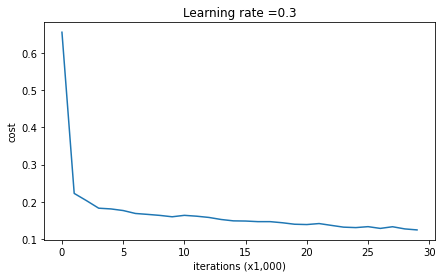

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [26]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

训练精度为94.8％，而测试精度为91.5％。这是基准模型的表现（你将观察到正则化对该模型的影响）。运行以下代码以绘制模型的决策边界。

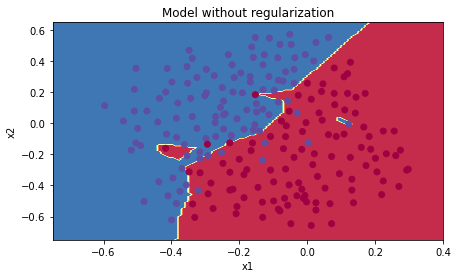

In [27]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


非正则化模型显然过度拟合了训练集，拟合了一些噪声点！现在让我们看一下减少过拟合的两种手段。

## 2 L2正则化

避免过拟合的标准方法称为 L2正则化，它将损失函数从：
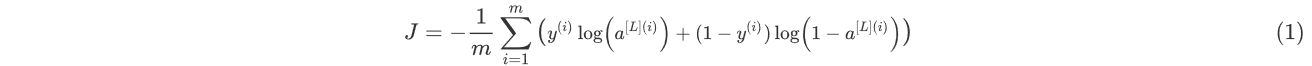
修改到：
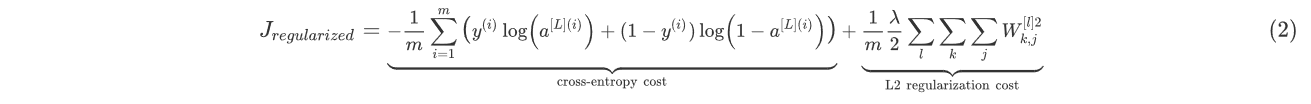
让我们修改损失并观察结果。

**练习**：实现compute_cost_with_regularization（），以计算公式（2）的损失。

In [28]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (1./m*lambd/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

当然，因为你更改了损失，所以还必须更改反向传播！ 必须针对新损失函数计算所有梯度。

**练习**：实现正则化后的反向传播。更改仅涉及dW1，dW2和dW3。对于每一个，你必须添加正则化项的梯度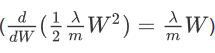

In [30]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.

    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar

    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y

    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd/m * W3
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd/m * W2
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd/m * W1
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

现在让我们使用L2正则化（$\lambda$$=0.7$）运行的模型。model()函数将调用：

    compute_cost_with_regularization代替compute_cost
    backward_propagation_with_regularization代替backward_propagation


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


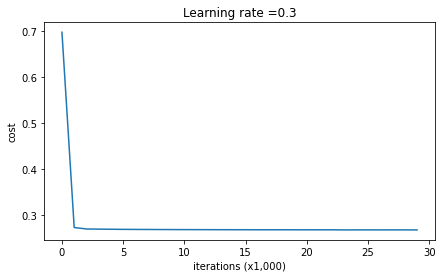

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [34]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)



Nice！测试集的准确性提高到93％。你成功拯救了法国足球队！

模型不再过拟合训练数据了。让我们绘制决策边界看一下。


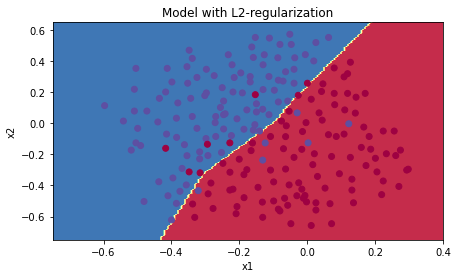

In [32]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**观察**：

 $\lambda$的值是你可以调整开发集的超参数。
 
 L2正则化使决策边界更平滑。如果$\lambda$太大，则也可能“过度平滑”，从而使模型偏差较高。

**L2正则化的原理**：

L2正则化基于以下假设：权重较小的模型比权重较大的模型更简单。因此，通过对损失函数中权重的平方值进行惩罚，可以将所有权重驱动为较小的值。比重太大会使损失过高！这将导致模型更平滑，输出随着输入的变化而变化得更慢。

**你应该记住**L2正则化的影响：

    损失计算：
        - 正则化条件会添加到损失函数中
    反向传播函数：
        - 有关权重矩阵的渐变中还有其他术语
    权重最终变小（“权重衰减”）：
        - 权重被推到较小的值。


## 3 Dropout

最后，Dropout是广泛用于深度学习的正则化技术。
它会在每次迭代中随机关闭一些神经元。
观看这两个video，看看这它是什么意思！

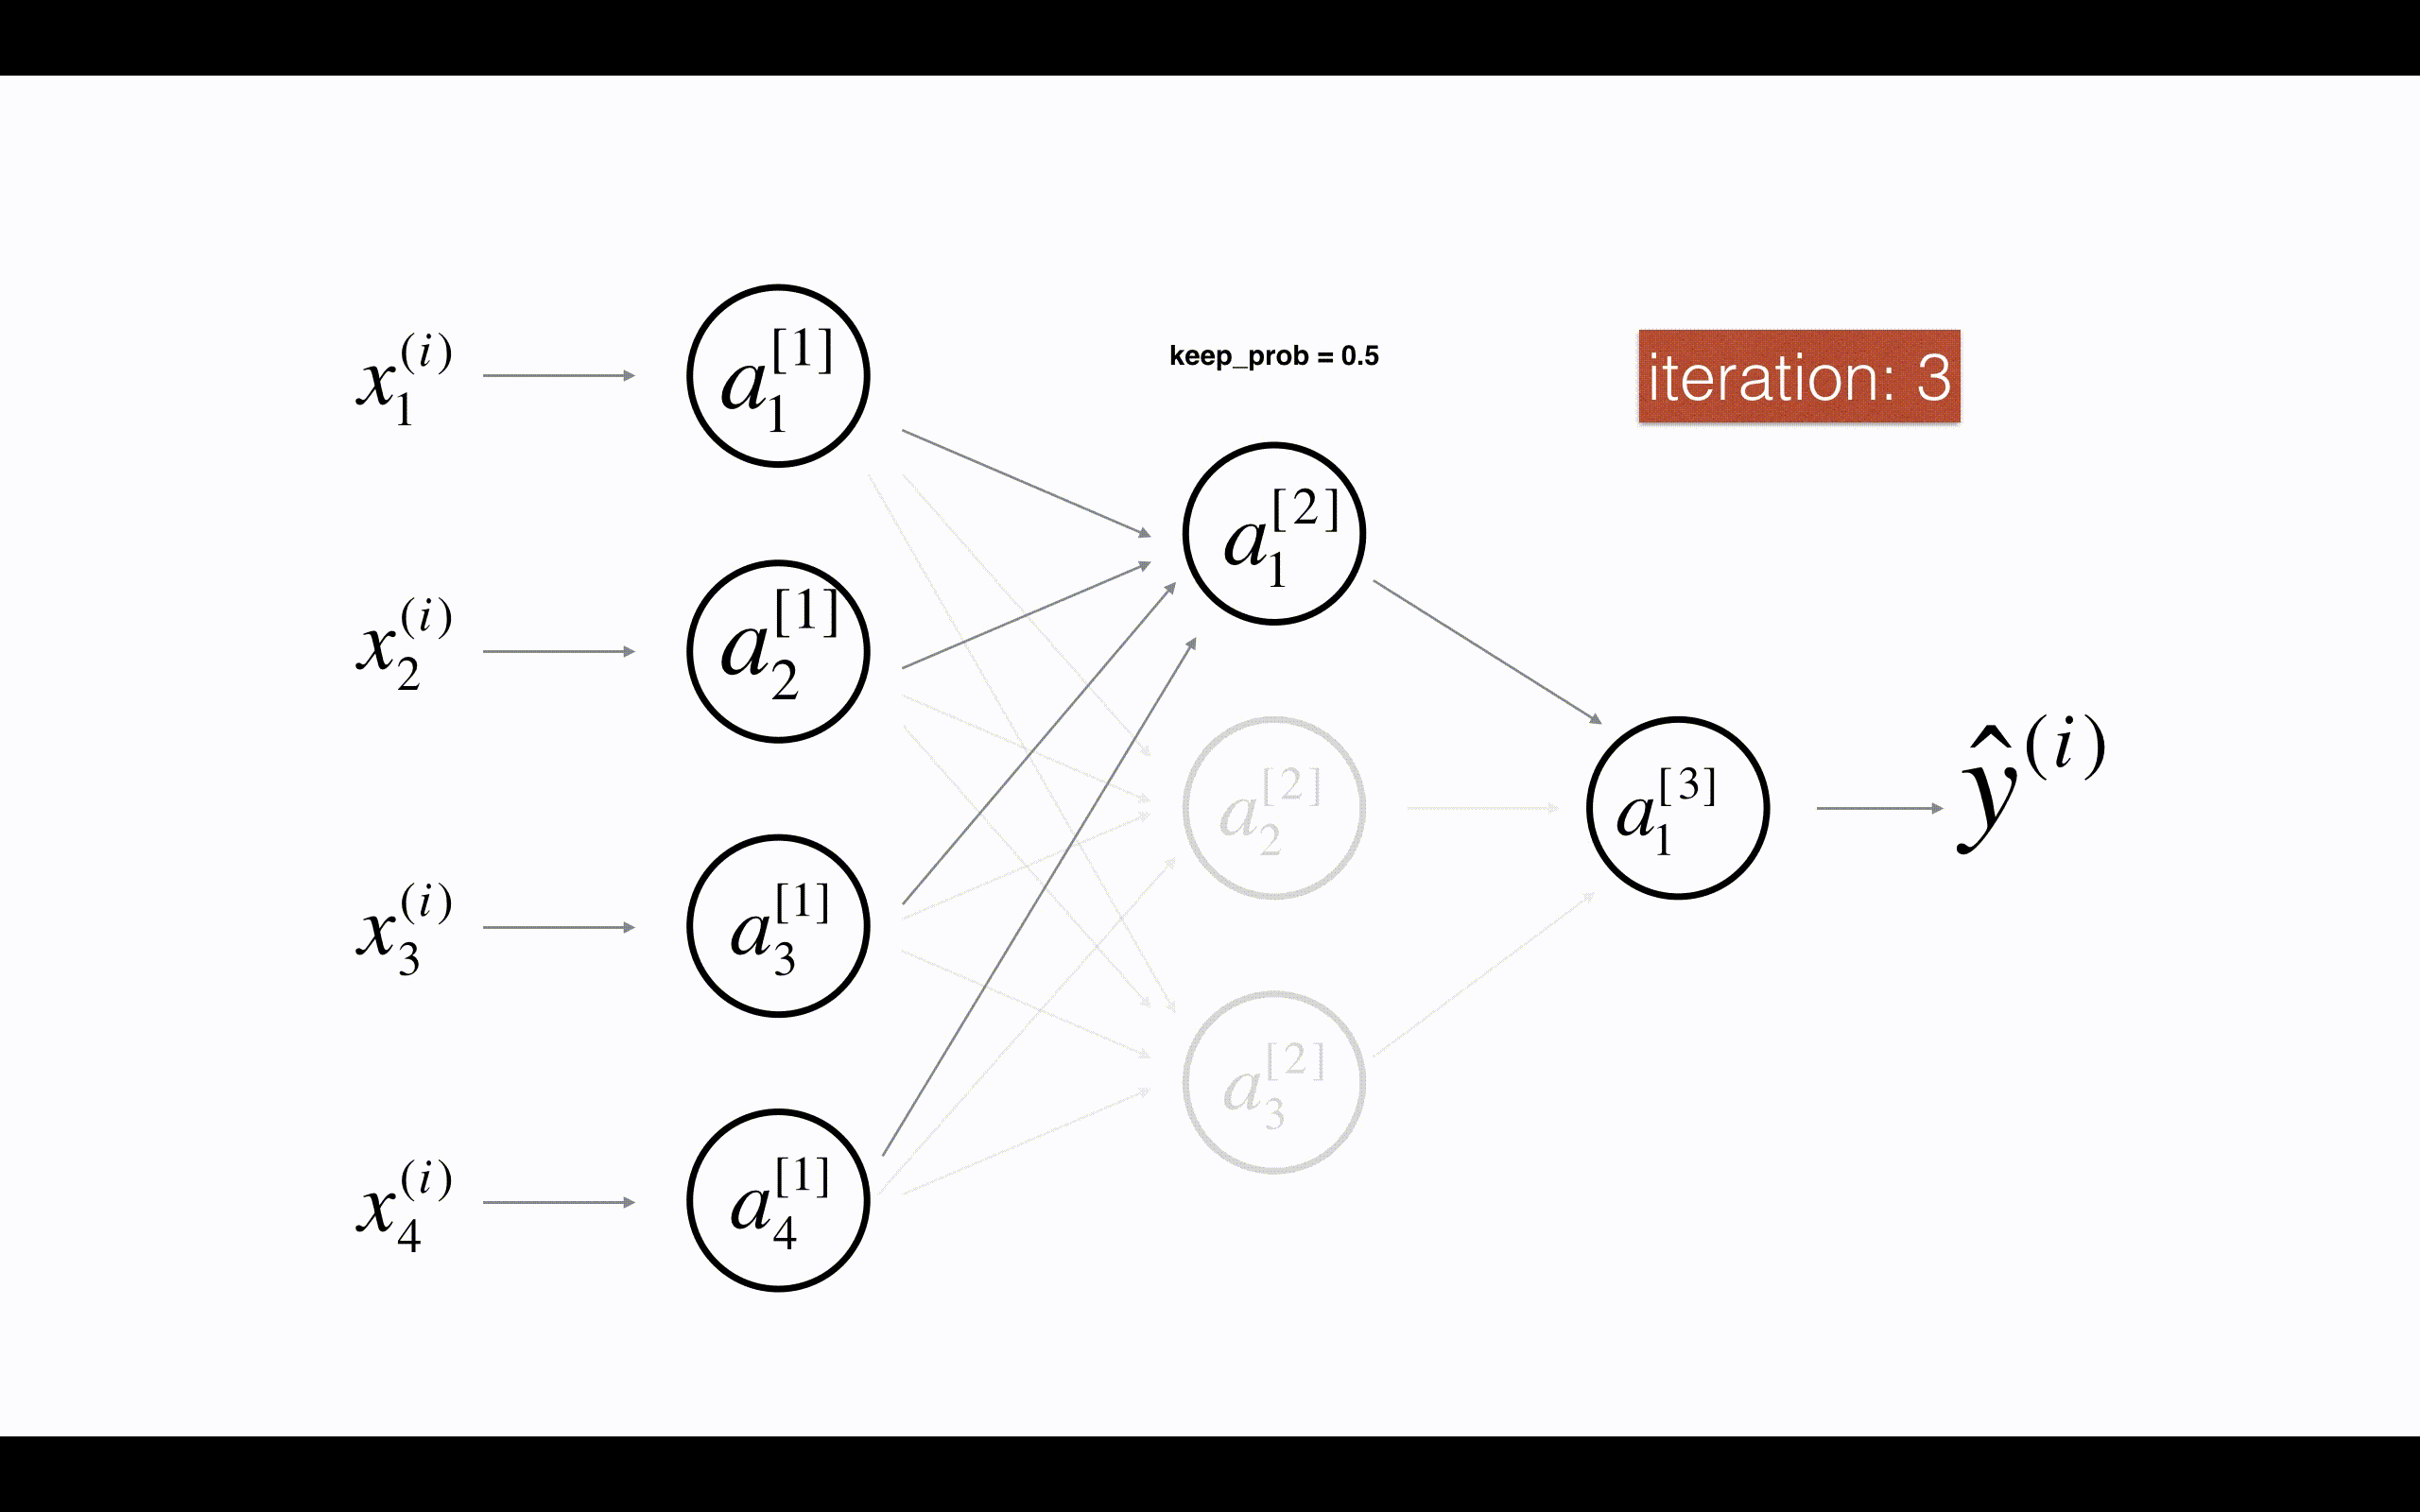

在每次迭代中，你以$1-keep_prob$概率或以$keep_prob$概率（此处为50％）关闭此层的每个神经元。关闭的神经元对迭代的正向和反向传播均无助于训练。

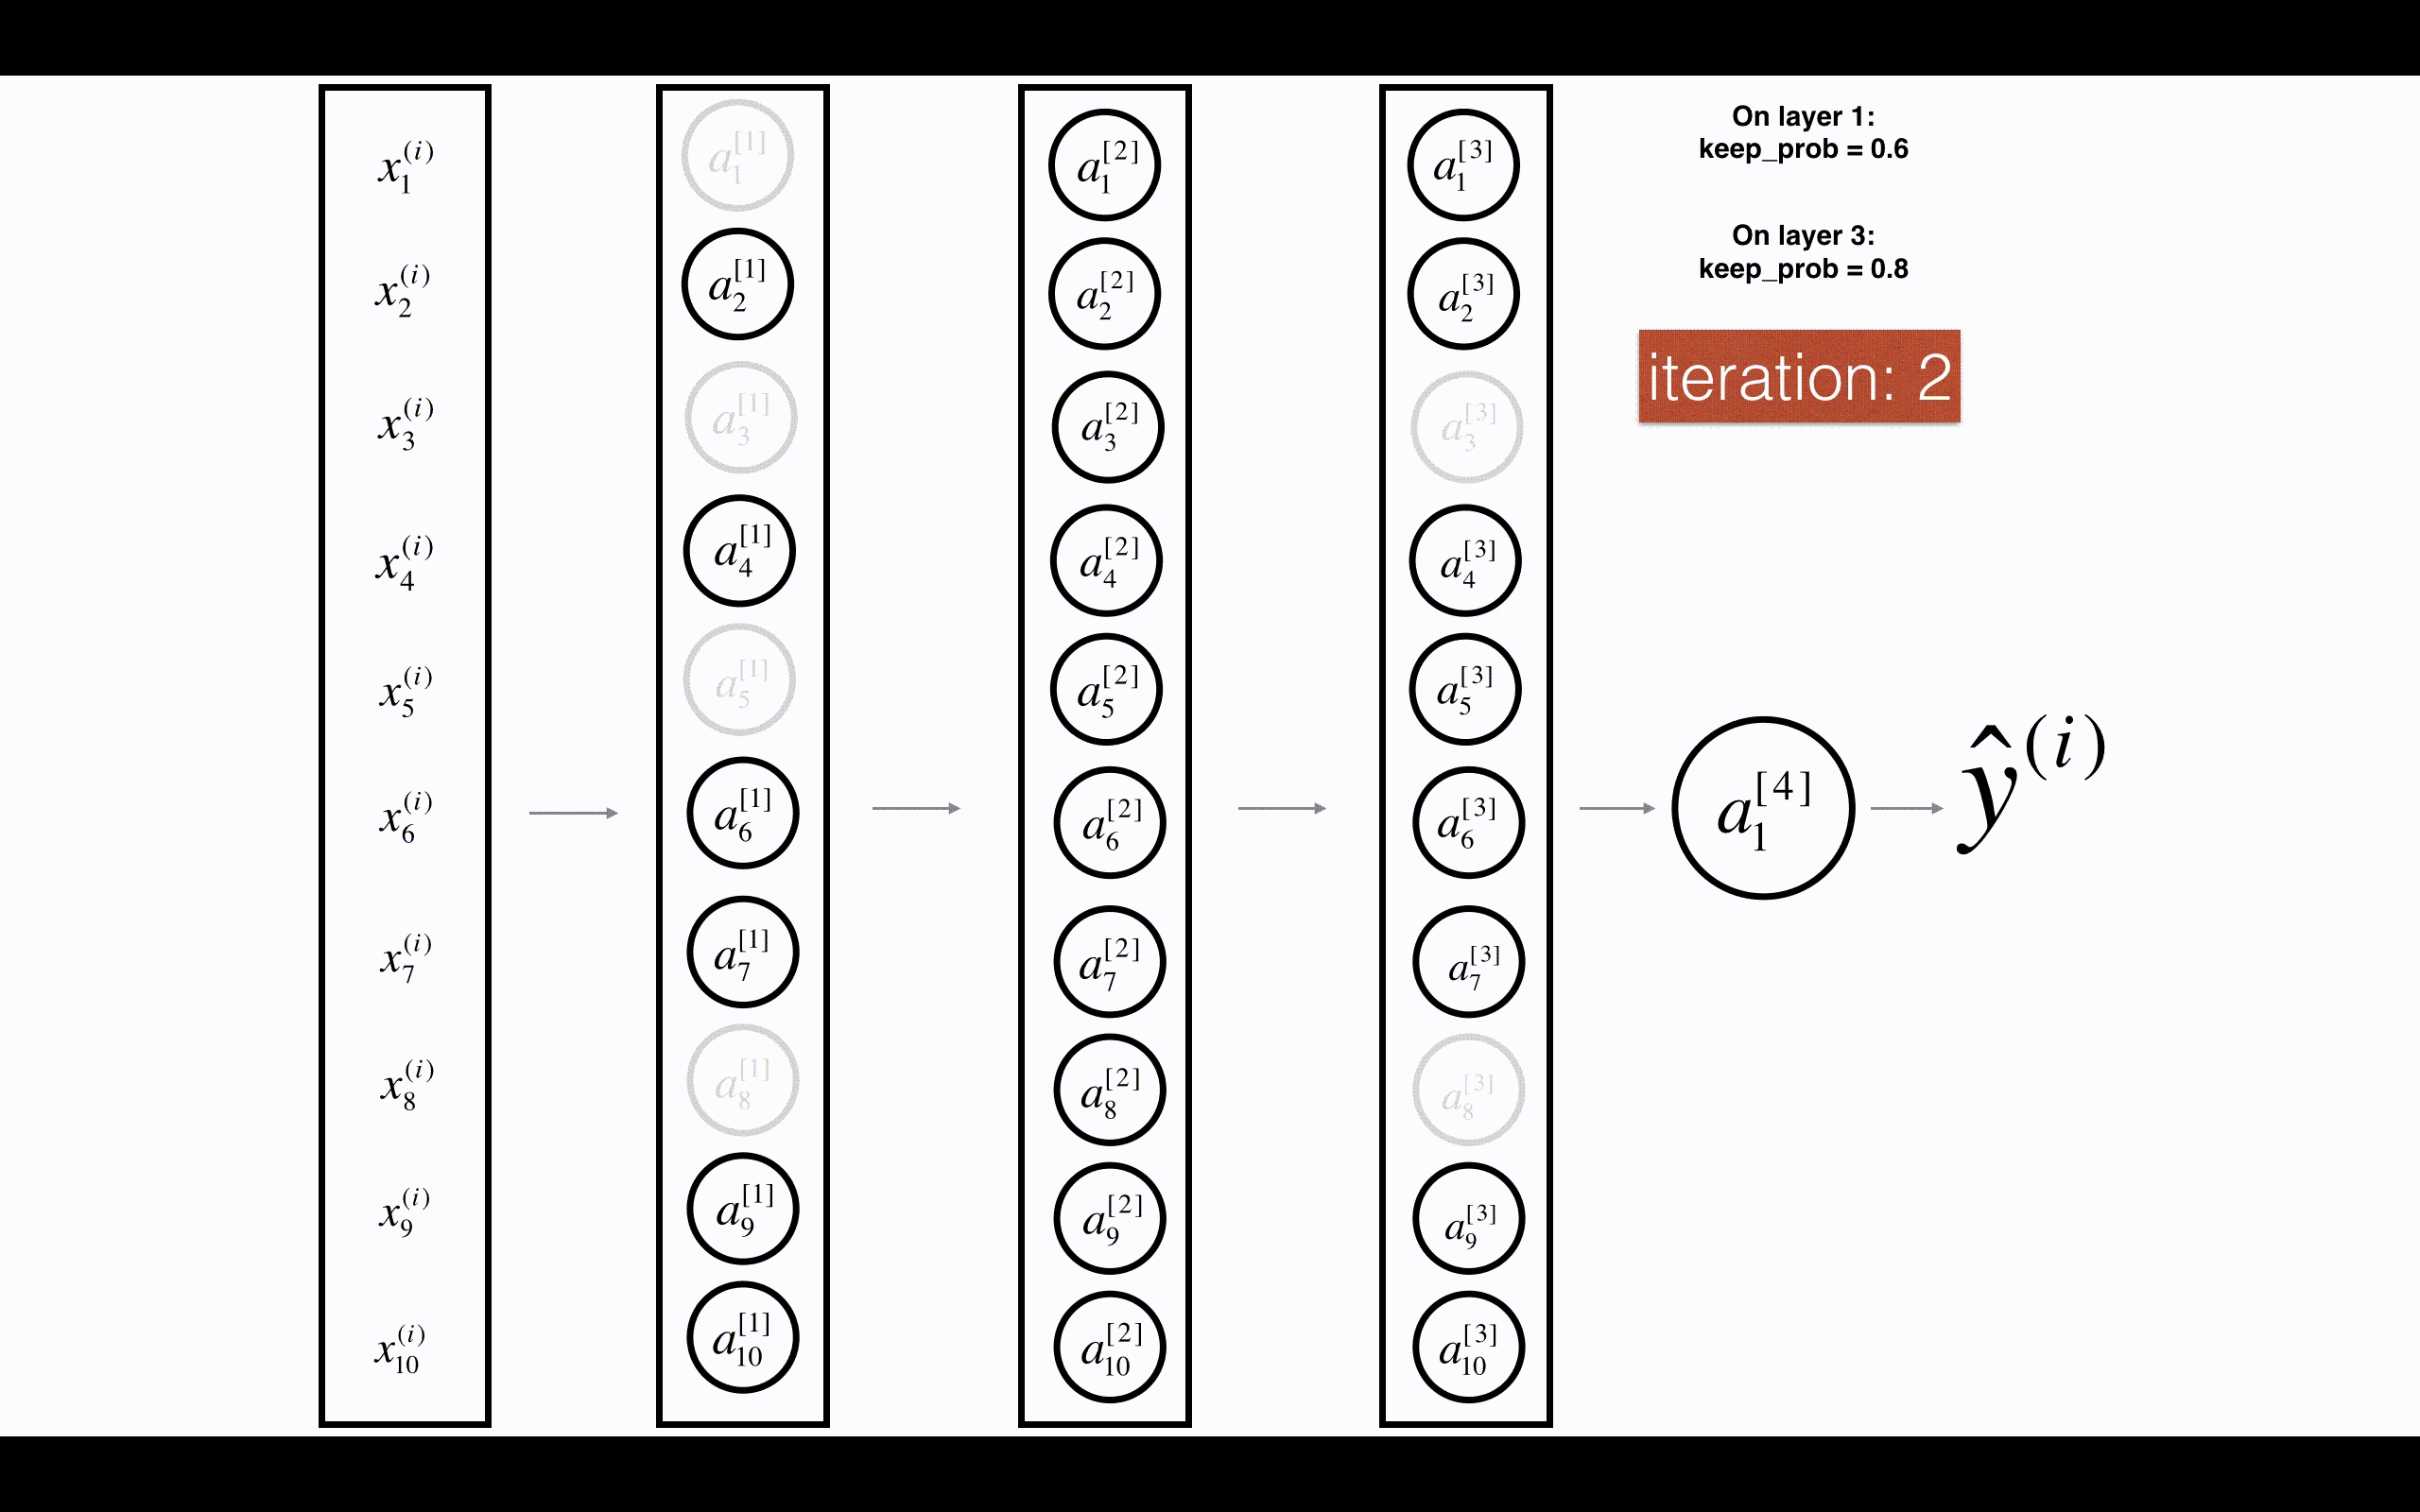

当你关闭某些神经元时，实际上是在修改模型。Dropout背后的想法是，在每次迭代中，你将训练仅使用神经元子集的不同模型。通过Dropout，你的神经元对另一种特定神经元的激活变得不那么敏感，因为另一神经元可能随时关闭。

### 3.1 带有Dropout的正向传播

**练习**：实现带有Dropout的正向传播。你正在使用3层的神经网络，并将为第一和第二隐藏层添加Dropout。我们不会将Dropout应用于输入层或输出层。

**说明**：
关闭第一层和第二层中的某些神经元。为此，将执行4个步骤：

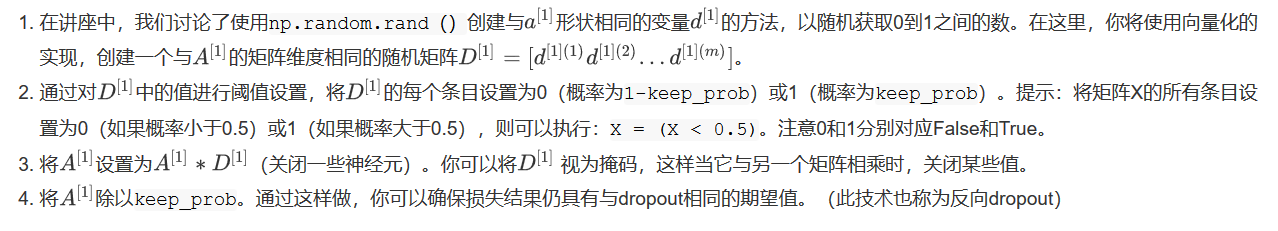

In [35]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])                                         # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1 < keep_prob                                      # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1 * D1                                         # Step 3: shut down some neurons of A1
    A1 = A1 / keep_prob                                        # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                                         # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2 < keep_prob                                         # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2 * D2                                         # Step 3: shut down some neurons of A2
    A2 = A2 / keep_prob                                      # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

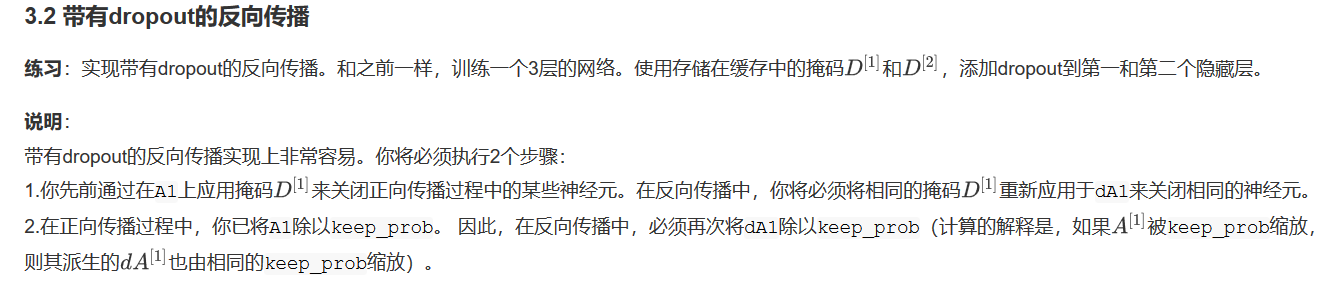

In [36]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:

    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2 * D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / keep_prob           # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1 * D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / keep_prob             # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients



现在让我们使用dropout（keep_prob = 0.86）运行模型。 这意味着在每次迭代中，你都以14％的概率关闭第1层和第2层的每个神经元。 函数model()将调用：

    forward_propagation_with_dropout而不是forward_propagation。
    backward_propagation_with_dropout，而不是backward_propagation。


Cost after iteration 0: 0.6543912405149825
Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


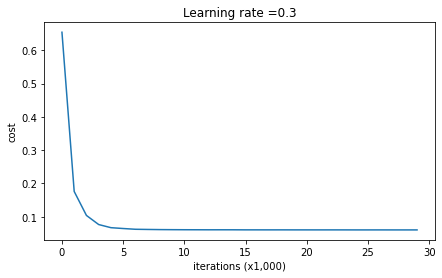

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [39]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)



Dropout效果很好！测试精度再次提高（达到95％）！模型并未过拟合训练集，并且在测试集上表现很好。法国足球队将永远感激你！

运行以下代码以绘制决策边界。


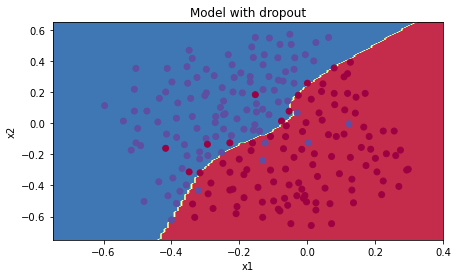

In [41]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)



**注意**：

    使用dropout时的常见错误是在训练和测试中都使用。你只能在训练中使用dropout（随机删除节点）。
    深度学习框架，例如tensorflow, PaddlePaddle, keras或者 caffe 附带dropout层的实现。不需强调-相信你很快就会学习到其中的一些框架。

**关于dropout你应该记住的事情**：

    dropout是一种正则化技术。
    仅在训练期间使用dropout，在测试期间不要使用。
    在正向和反向传播期间均应用dropout。
    在训练期间，将每个dropout层除以keep_prob，以保持激活的期望值相同。例如，如果keep_prob为0.5，则平均而言，我们将关闭一半的节点，因此输出将按0.5缩放，因为只有剩余的一半对解决方案有所贡献。除以0.5等于乘以2，因此输出现在具有相同的期望值。你可以检查此方法是否有效，即使keep_prob的值不是0.5。




## 4 结论

这是我们三个模型的结果：

|  模型  |训练精度|测试精度|
|:----:|:----:|:----:|
|三层神经网络，无正则化|95％|91.50％|
|具有L2正则化的3层NN|94％|93％|
|具有dropout的3层NN|93％|95％|

请注意，正则化会损害训练集的性能！ 这是因为它限制了网络过拟合训练集的能力。 但是，由于它最终可以提供更好的测试准确性，因此可以为你的系统提供帮助。

恭喜你完成此作业！ 同时也帮助了法国足球。 :-)

**我们希望你从此笔记本中记住的内容**：

    正则化将帮助减少过拟合。
    正则化将使权重降低到较低的值。
    L2正则化和Dropout是两种非常有效的正则化技术。




# 梯度检验

欢迎来到本周的最后作业！在本作业中，你将学习实现和使用梯度检验。

假设你是致力于在全球范围内提供移动支付的团队的一员，被上级要求建立深度学习模型来检测欺诈行为--每当有人进行支付时，你都应该确认该支付是否可能是欺诈性的，例如用户的帐户已被黑客入侵。

但是模型的反向传播很难实现，有时还会有错误。因为这是关键的应用任务，所以你公司的CEO要反复确定反向传播的实现是正确的。CEO要求你证明你的反向传播实际上是有效的！为了保证这一点，你将应用到“梯度检验”。

让我们开始做吧！


In [42]:
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector


## 1 梯度检验原理

反向传播计算梯度，其中表示模型的参数。使用正向传播和损失函数来计算。

由于正向传播相对容易实现，相信你有信心能做到这一点，确定100％计算正确的损失。为此，你可以使用来验证代码。

让我们回顾一下导数（或者说梯度）的定义：

如果你还不熟悉""表示法，其意思只是“当值趋向很小时”。

我们知道以下内容：

    是你要确保计算正确的对象。
    你可以计算和（在是实数的情况下），因为要保证的实现是正确的。

让我们使用方程式（1）和 的一个小值来说服CEO你计算的代码是正确的！


## 2 一维梯度检查

思考一维线性函数，该模型仅包含一个实数值参数 ，并以作为输入。

你将实现代码以计算 及其派生，然后，你将使用梯度检验来确保的导数计算正确。

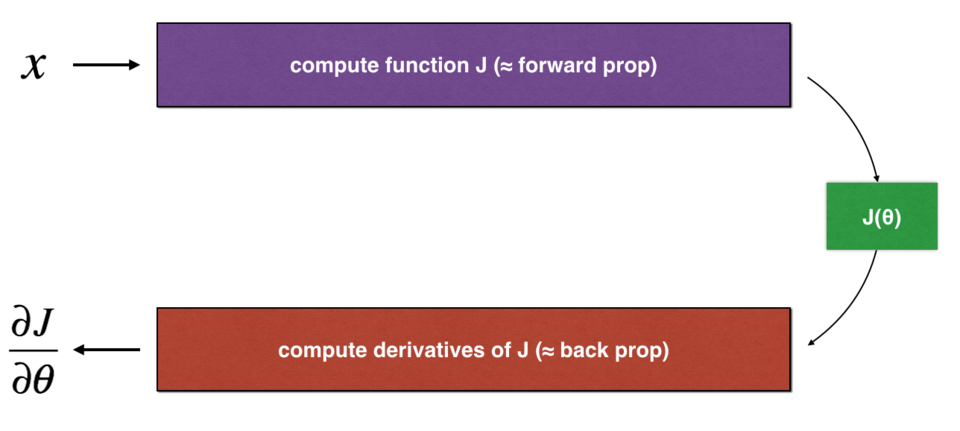

上图显示了关键的计算步骤：首先从开始，再评估函数（正向传播），然后计算导数（反向传播）。

**练习**：为此简单函数实现“正向传播”和“向后传播”。 即在两个单独的函数中，计算 （正向传播）及其相对于（反向传播）的导数。

In [43]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (compute J) presented in Figure 1 (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    ### START CODE HERE ### (approx. 1 line)
    J = theta * x
    ### END CODE HERE ###
    
    return J

In [44]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


**练习**：现在，执行图1的反向传播步骤（导数计算）。

In [45]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta (see Figure 1).
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    ### START CODE HERE ### (approx. 1 line)
    dtheta = x
    ### END CODE HERE ###

    
    return dtheta

In [46]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


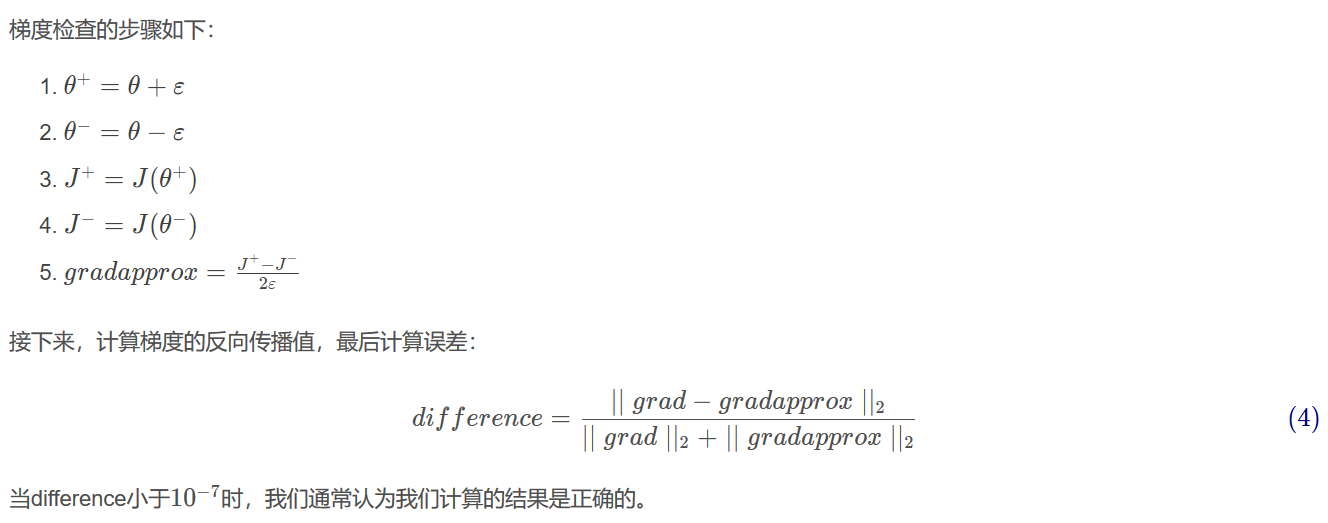

In [47]:
# GRADED FUNCTION: gradient_check

def gradient_check(x, theta, epsilon = 1e-7):
    """
    Implement the backward propagation presented in Figure 1.
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Compute gradapprox using left side of formula (1). epsilon is small enough, you don't need to worry about the limit.
    ### START CODE HERE ### (approx. 5 lines)
    thetaplus = theta + epsilon                               # Step 1
    thetaminus = theta - epsilon                              # Step 2
    J_plus = forward_propagation(x, thetaplus)                                  # Step 3
    J_minus = forward_propagation(x, thetaminus)                                 # Step 4
    gradapprox = (J_plus - J_minus) / (2 * epsilon)                              # Step 5
    ### END CODE HERE ###

    # Check if gradapprox is close enough to the output of backward_propagation()
    ### START CODE HERE ### (approx. 1 line)
    grad = backward_propagation(x, theta)
    ### END CODE HERE ###

    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                               # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                            # Step 2'
    difference = numerator / denominator                              # Step 3'
    ### END CODE HERE ###
    
    if difference < 1e-7:
        print ("The gradient is correct!")
    else:
        print ("The gradient is wrong!")
    
    return difference

In [48]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10




Nice！差异小于阈值。因此可以放心，你已经在backward_propagation（）中正确计算了梯度。

现在，在更一般的情况下，你的损失函数具有多个单个1D输入。当你训练神经网络时，实际上由多个矩阵组成，并加上偏差！重要的是要知道如何对高维输入进行梯度检验。我们开始动手吧！


## 3 N维梯度检验

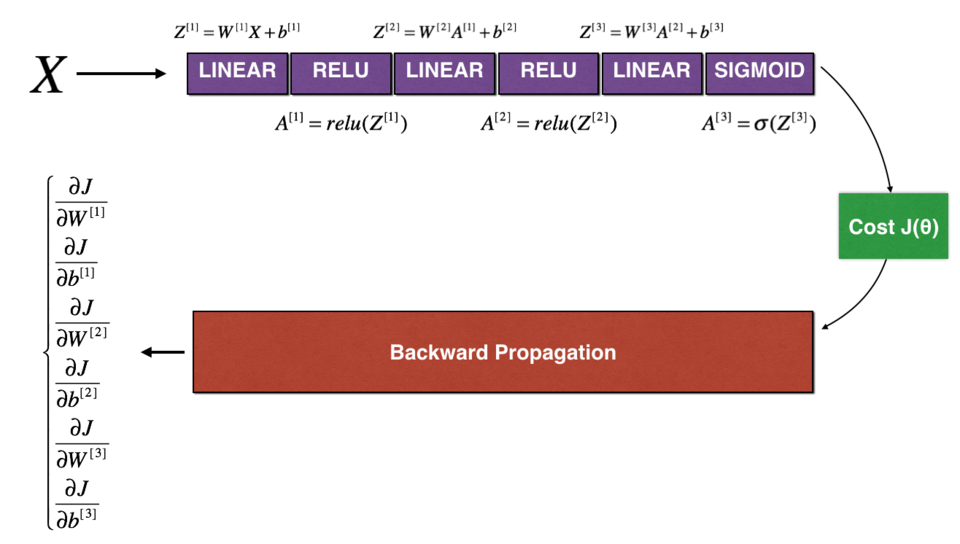

LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

让我们看一下正向传播和反向传播的实现。

In [49]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

现在，运行反向传播。

In [50]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) * 2    # Should not multiply by 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)    # Should not multiply by 4
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

与1和2中一样，你想将“gradapprox”与通过反向传播计算的梯度进行比较。公式仍然是：

但是，不再是标量。 而是一个叫做“参数”的字典。 我们为你实现了一个函数"dictionary_to_vector()"。它将“参数”字典转换为称为“值”的向量，该向量是通过将所有参数(W1, b1, W2, b2, W3, b3)重塑为向量并将它们串联而获得的。

反函数是“vector_to_dictionary”，它输出回“parameters”字典。

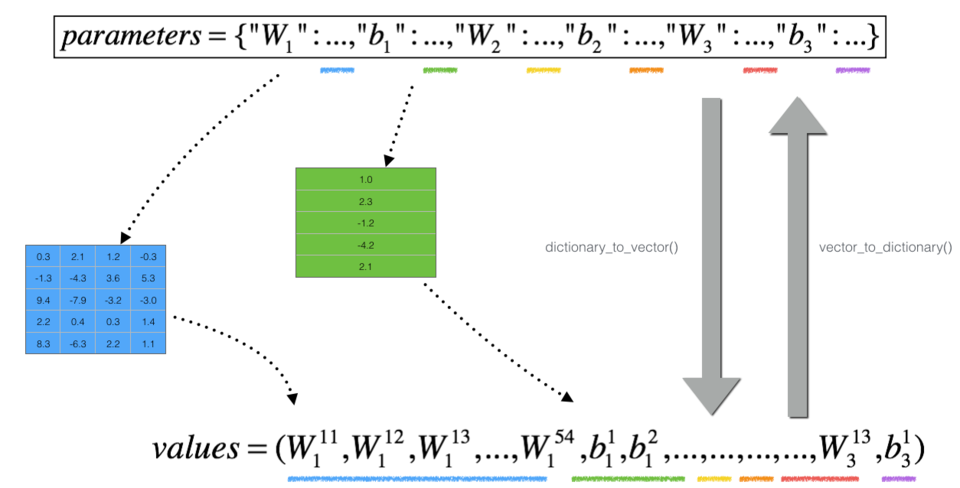

你将在 gradient_check_n()中用到这些函数

我们还使用gradients_to_vector()将“gradients”字典转换为向量“grad”。

**练习**：实现gradient_check_n()。

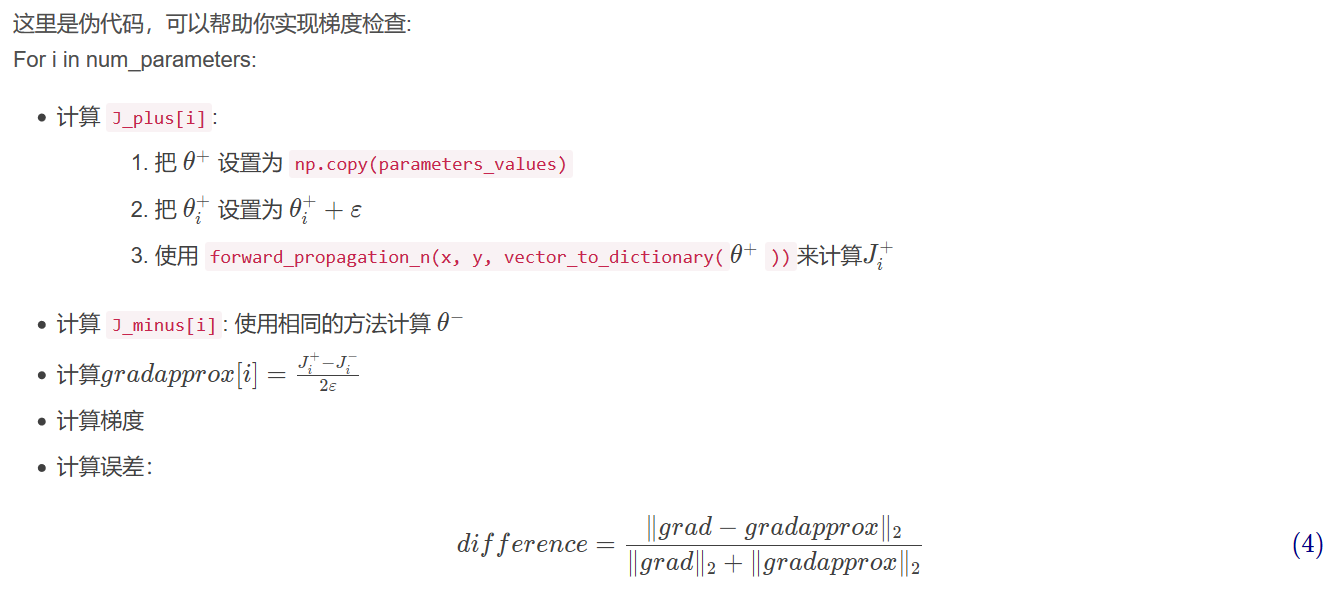

In [51]:
# GRADED FUNCTION: gradient_check_n

def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        ### START CODE HERE ### (approx. 3 lines)
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))                                  # Step 3
        ### END CODE HERE ###

        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        ### START CODE HERE ### (approx. 3 lines)
        thetaminus = np.copy(parameters_values)                                     # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                            # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))                                  # Step 3
        ### END CODE HERE ###

        # Compute gradapprox[i]
        ### START CODE HERE ### (approx. 1 line)
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2.* epsilon)
        ### END CODE HERE ###

    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad - gradapprox)                                           # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)                                         # Step 2'
    difference = numerator / denominator                                          # Step 3'
    ### END CODE HERE ###

    if difference > 1e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [ ]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)



看起来backward_propagation_n代码似乎有错误！很好，你已经实现了梯度检验。返回到backward_propagation并尝试查找/更正错误（提示：检查dW2和db1）。如果你已解决问题，请重新运行梯度检验。请记住，如果修改代码，则需要重新执行定义backward_propagation_n()的单元格。

你可以进行梯度检验来证明你的导数计算的正确吗？即使作业的这一部分没有评分，我们也强烈建议你尝试查找错误并重新运行梯度检验，直到确信实现了正确的反向传播。

**注意**

    梯度检验很慢！用 逼近梯度在计算上是很耗费资源的。因此，我们不会在训练期间的每次迭代中都进行梯度检验。只需检查几次梯度是否正确。
    至少如我们介绍的那样，梯度检验不适用于dropout。通常，你将运行不带dropout的梯度检验算法以确保你的backprop是正确的，然后添加dropout。

Nice！现在你可以确信你用于欺诈检测的深度学习模型可以正常工作！甚至可以用它来说服你的CEO。 :)

**你在此笔记本中应记住的内容**：

    梯度检验可验证反向传播的梯度与梯度的数值近似值之间的接近度（使用正向传播进行计算）。
    梯度检验很慢，因此我们不会在每次训练中都运行它。通常，你仅需确保其代码正确即可运行它，然后将其关闭并将backprop用于实际的学习过程。

